In [6]:
#pakker
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image
from IPython.display import display
import numpy as np 
import sympy as sp
import json
import requests
from pyjstat import pyjstat

#funksjon for å omgjøre api og query til dataframe 
def apiToDataframe(postUrl, query):
    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.
    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

# Oppgave 3.1.1

### Før stønad

Tones nyttefunksjon er som følger, hvor hun bare får nytte av konsum $c$ og fritid $l$:

$$U(c, l) = c^{0.5} * L^{0.5}$$

Da vi har fått oppgit hvor mye Tone kan maksimalt jobbe $l_0$ (60 timer) og hennes arbeidsfrie inntekt $m$ (100) i ti talls kroner, kan vi finne hennes reservasjonslønn. Da Tone kun kan velge mellom å jobbe fulltid $h_{ft}$ (40 timer) eller å stå utenfor arbeidsmarkedet, må man finne reservasjonslønnen som gjør henne indifferent mellom disse valgene. Det vil si finne lønnen (reservasjonslønnen for fulltid) som gir lik nytte som å stå utenfor arbeidsmarkedet. 

Vi kan sette opp følgende ligning for å finne reservasjonslønnen hennes:

$$U[(m + w^r_{ft}*h_{ft}), (l_0 - h_{ft})] = U(m, l_0)$$

Først setter vi inn for $m$ og $l_0$ i $U(m, l_0)$ og får at nytten til Tone når hun velger å ikke jobbe er $77.46$. Videre løser vi følgende likning:

$$U[(m + w^r_{ft}*h_{ft}), (l_0 - h_{ft})] = 77.46$$

Vi setter inn for $m$, $h_{ft}$ og $l_0$, og får følgende likning:

$$U[(100 + w^r_{ft}*40), (60 - 40)] = 77.46 \rightarrow (w^r_{ft} * 40 + 100)^{0.5} * (60-40)^{0.5} = 77.46$$

Videre løser vi likningen med hensyn på $w^r_{ft}$. Først opphøyer vi alt i $2$:

$$6000 = (40 * w^r_{ft} + 100) * (20)$$

Og multipliserer deretter begge sider med $\frac{1}{20}$ og får følgende:

$$300 = 40 * w^r_{ft} + 100$$

Deretter trekker vi i fra $100$ på begge sider:

$$200 = 40 * w^r_{ft}$$

Multipliserer med $\frac{1}{40}$ på begge sider og får at $w^r_{ft}$ er:

$$w^r_{ft} = 5$$

Som vil si at lønnen Tone krever for å være indifferent mellom å jobbe og ikke jobbe er 5 (i ti talls kroner), som vil si 50 kr timen. Tall har blitt avrundet i utregninger, og er dermed ikke 100% presise.

### Etter stønad

Etter innføring av en stønad $b$ på 100 (i t tall kroner), endres Tones reservasjonslønn da hun får økt nytte av å være hjemme. Hennes arbeidsfrie inntekt vil øke til $m + b$, som vil si $100 + 100 = 200$ når hun velger å la være å jobbe. Dersom hun velger å jobbe, bortfaller stønaden. For å finne hennes nye reservasjonslønn etter innføringen av stønaden må vi løse følgende likning:

$$U[(m + w^r_{ft}*h_{ft}), (l_0 - h_{ft})] = U[(m + b), l_0]$$

Igjen regner vi først ut Tones nytte når hun velger å ikke jobbe. Vi setter inn for $(m+b)$ og $l_0$ i nyttefunksjonen og finner at hennes nytte når hun velger å ikke jobbe er: $109.54$. Videre setter man dette inn i likningen ovenfor, samt de andre variablene og får følgende:

$$U[(100 + w^r_{ft}*40), (60 - 40)] = 109.54 \rightarrow (w^r_{ft} * 40 + 100)^{0.5} * (60-40)^{0.5} = 109.54$$

For å løse likningen starter vi med å opphøye alt i $2$, og får da:

$$11999 = (40 * w^r_{ft} + 100) * (20)$$

Videre multipliserer man begge sider med $\frac{1}{20}$ og får følgende:

$$600 = 40 * w^r_{ft} + 100$$

Videre trekker vi i fra $100$ fra begge sider, og får:

$$500 = 40 * w^r_{ft}$$

Og til slutt finner vi Tones reservasjonslønn ved å multiplisere med $\frac{1}{40}$ på begge sider, og får:

$$w^r_{ft} = 12.5$$

Dette vil si at lønnen som gjør Tone indifferent mellom å stå utenfor arbeidsmarkedet og å jobbe etter innføringen av stønaden er $12.5$ i ti talls kroner, som vil si at hennes nye reservasjonslønn er $125$ kr timen. Igjen er det blitt gjennomført avrundinger i utregningene i oppgaven, og dermed ikke 100% presist.

### Hvorfor er $w_r^{ft}$ ulik i situasjonene?

Reservasjonslønenn er ulik i de to situasjonen grunnet at Tone har fått økt nytte (tilfredshet) ved å være hjemme etter at stønaden ble innført. Hun vil dermed kreve enn høyere lønn for å delta på arbeidsmarkedet, ellers vil hun få lavere tilfredshet ved å delta på arbeidsmarkedet. Figuren nedenfor viser situasjonen:


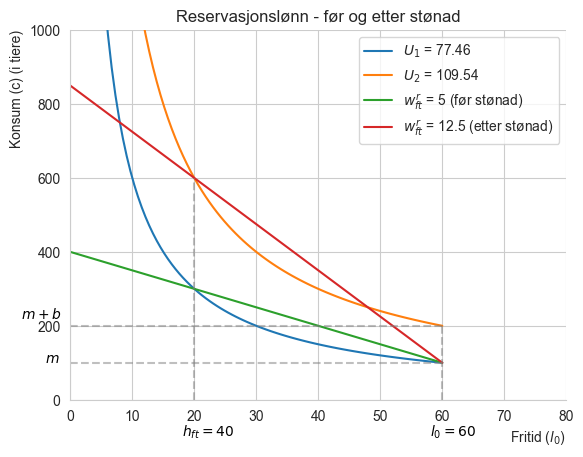

In [7]:
#definerer nyttefunksjon
def nytte(l, u):
    return (u**2)/l

#wr før stønad
def wr(l_num):
    return (100+60*(5))-(l_num*5)

#wr etter stønad
def wr_s(l_num):
    return (100+60*(12.5))-(l_num*12.5)

#definerer x-nummer, altså maks antall timer Tone kan jobbe.    
l_num=np.linspace(0.01,60,100)

#lager akse
fig, ax = plt.subplots()
ax.set_ylabel('Konsum (c) (i tiere)', loc='top')
ax.set_xlabel('Fritid ($l_0$)', loc='right')
ax.set(xlim=(0,80))
ax.set(ylim=(0,1000))
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

#plotter nyttefunksjoner
ax.plot(l_num, nytte(l_num, 77.46), label = "$U_1$ = 77.46")
ax.plot(l_num, nytte(l_num, 109.54), label = "$U_2$ = 109.54")

#plotter reservasjonslønner
ax.plot(l_num, wr(l_num), label = "$w^r_{ft}$ = 5 (før stønad)")
ax.plot(l_num, wr_s(l_num), label = "$w^r_{ft}$ = 12.5 (etter stønad)")

#stiplet linjer - vertikal
ax.axvline(x=60, ymin=0.01/1000, ymax=200/1000, color='grey', linestyle='--', alpha = 0.5)
ax.axvline(x=20, ymin=0.01/1000, ymax=600/1000, color='grey', linestyle='--', alpha = 0.5)

#stiplet horisontal linjer
ax.axhline(y=200, xmin=0.01/80, xmax=60/80, color='grey', linestyle='--', alpha = 0.5)
ax.axhline(y=100, xmin=0.01/80, xmax=60/80, color='grey', linestyle='--', alpha = 0.5)

#symboler utenfor akse
ax.annotate('$l_0 = 60$', (58, -100), color='black', annotation_clip=False)
ax.annotate('$h_{ft} = 40$', (18, -100), color='black', annotation_clip=False)
ax.annotate('$m$', (-4, 100), color='black', annotation_clip=False)
ax.annotate('$m + b$', (-8, 218), color='black', annotation_clip=False)

ax.set_title('Reservasjonslønn - før og etter stønad')
ax.legend(loc='best');

Figuren ovenfor viser Tones nytte når hun velger å ikke jobbe, både før og etter innføringen av stønaden. Før innføringen av stønaden fikk Tone $U_1$ nytte ved å stå utenfor arbeidsmarkedet. For at hun skal være indifferent mellom å jobbe fulltid (40 timer) eller stå utenfor arbeidsmarkedet, må hun få en lønn som gir henne nytte $U_1$. Denne lønnen er hennes reservasjonslønn og er gitt ved helningen på den grønne linjen i figuren. For Tone vil denne være $50$ kroner per time.

Etter innføringen av stønaden har Tones nytte økt til $U_2$ når hun velger å ikke jobbe. Dersom hun velger å jobbe bortfaller stønaden. For at hun nå skal være indifferent mellom å jobbe fulltid (40 timer) eller stå utenfor arbeidsmarkedet, må hun få en lønn som gir henne $U_2$ nytte når hun jobber fulltid. Dette er hennes reservasjonslønn $w^r_{ft}$ etter innføringen av stønaden, og er gitt ved den røde linjen i figuren. Helningen på denne representerer Tones nye reservasjonslønn, og er $125$ kroner per time.

# Oppgave 3.1.2

### Effekter av trygd på et ufullkommen arbeidsmarked

Da arbeidsmarkedet sjelden er fullkomment, skal man se på effekter av trygd på ufullkommene arbeidsmarkeder. Her skal man gå gjennom "Jobbsøkereffekten", "Lønnseffekten" og "Rettighetseffekten". I tillegg ska man se på effekter av sanksjoner som føres av myndigheter. Til slutt skal man avslutte med å se på funn i empiriske studier.

#### Jobbsøkereffekten

For å kunne gå gjennom jobbsøker-effekten, må man først vite hva forskjellen på en statisk reservasjonslønn og en dynamisk reservasjonslønn. Den statiske reservasjonslønnen er lønnen som gjør individet indifferent mellom å stå utenfor arbeidsmarkedet eller å jobbe. Den dynamiske reservasjonslønnen er derimot den lønnen som gjør individet indifferent mellom å godta ett jobbtilbud eller å forstsette å søke etter en annen jobb. Dersom reservasjonslønnen er lav, vil det være mange jobber som er aktuell for individet, og dersom den er høy vil det være færre jobber individet ønsker å ta.

Da man får arbeidsledighetstrygd når man søker etter jobb, vil alternativkostnaden for å ikke ha jobb bli lavere, grunnet at man opprettholde et relativt høyt konsum da man får stønad. Dette medfører lavere søk-intensitet, grunnet at individet opplever mindre press med å godta ett jobbtilbud grunnet sikkerheten i form av stønad, samt har råd til å bruke lengre tid på å finne en jobb som passer dem. I tillegg medfører dette en høyere dynamisk reservasjonslønn - som igjen vil si at individet krever en høyere lønn for å godta ett jobbtilbud. 

#### Lønnseffekten

Dersom det tar tid for arbeidsmarkedets parter å finne hverandre, vil både arbeidsgivere og arbeidstakere kunne påvirke lønnen. La oss si at arbeidsgiver vet at arbeidstakeren ikke enkelt kan finne en annen jobb, dette vil kunne medføre en lavere lønn for arbeidstakeren, grunnet at arbeidsgiver vil presse ned lønnen. På andre siden har man også situasjoner hvor arbeidstakeren vet at bedriften ikke enkelt kan finne en annen arbeidstaker, dette kan medføre en høyere lønn til arbeidstakeren. Dette grunnet at arbeidstakeren vil kreve en høyere lønn, eller finne seg et annet sted å jobbe. Det som påvirker utfallet på lønn i dette tilfellet er forhandlingsposisjonen til arbeidsgiver og arbeidstaker.

Dersom individet får arbeidsledighetstrygd, vil en få en sikkerhet for inntekt. Dette vil medføre en sterkere posisjon til arbeidstaker når det kommer til forhandling av lønn. Igjen vil forhandlingsposisjonen avhenge av størrelsen på trygden - desto høyere trygd, desto sterkere forhandlingsposisjon. Høyere lønn medfører at arbeidstakere søker mindre intenst etter ny jobb, som videre medfører lavere verdi av nyansettelser og høyere kostnader bedriftene for å søke arbeidstakere. Bedriftene vil derfor redusere antall nye stillinger, og dermed blir det mindre ledige jobber.

#### Rettighetseffekten

I flere stater kreves det tidligere inntekt for å ha rett til arbeidsledighetstrygd, blant annet i Norge. Dette medfører at individet får økt verdi av å delta på arbeidsmarkedet, da dette gir tilgang til stønad ved arbeidsledighet. Ser man på arbeidssøkere som ikke har rett til trygd ( individer som er ny på arbeidsmarkedet) vil en trygd medføre at flere ønsker å delta, samt en økt søk-intensitet, da individet ønsker tilgangen på denne arbeidsledighetsforsikringen. Ser man på arbeidstakere som har deltatt i arbeidsmarkedet en stund, vil en høyere trygd medføre en høyere alternativkostnad ved å ha jobb, som vil medføre en lavere søk-intensitet. Dette grunnet at verdien ved å ha jobb er minket grunnet trygden. 

#### Effekter av sanksjoner

Da staten ikke ønsker at systemet misbrukes, kan den innføre sanskjoner mot individer som ikke søker intenst nokk, eller lar være å akseptere relevante jobber. Disse sansksjonene skjer gjerne i form av redusert trygd. Disse sanksjonene påvirker både de som har blitt truffet av disse, og de som ikke har det. For individer som ikke har blitt straffet av disse, vil de gi intensiver til å øke sin søk-intensitet, da disse ellers vil få en redusert trygd. For individer som har blitt straffet vil verdien av å være trygdet bli lavere, grunnet en redusert trygd. Dermed blir alternativkostnaden ved å være arbeidsledig høyere, som igjen gir intensiver til å finne seg en ny jobb.

#### Empiriske studier på effekten av arbeidsledighetstrygd

Funn gjort i studier av Van Ours og Vodopivec (2006, 2008), samt av Carling (2001) viser at en lengre maks erstatningstid medfører generelt at individer vil være lengre arbeidsledig. I tillegg viser studene nivået på arbeidsledighetstrygden har en mindre effekt på arbeidsledigheten. Grunnen til at arbeidsledigheten øker med lengre erstatningstid er blant annet at trygd gir inntektstøtte til å kunne finansiere lengre jobbsøkning. I tillegg forvrenger trygd insentivene, som kort fortalt gjør at individer som finner gode jobber velger heller å ha fri.

# Oppgave 3.2.a

Egenmeldingsordningen i Norge fungerer slik at en kan ringe inn syk til arbeidsgiver opptil 3 dager uten legeerklæring. I sangen "Tredageren" av Gatas Parlament derimot synger vokalistene om hvordan en bruker egenmelding for å blant annet kunne nyte solen, ha det moro og grille i 3 dager. Dette er regnes som et misbruk av ordningen. Figuren nedenfor viser hvordan fravær som følge av egenmelding i industrisektoren har utviklet seg siden 2001. I figuren har årene 2020 til 2022 blitt utelatt grunnet at resultatene kan være påvirket av koronapandemien. Dataene er hentet fra tabell 12441 fra SSB.

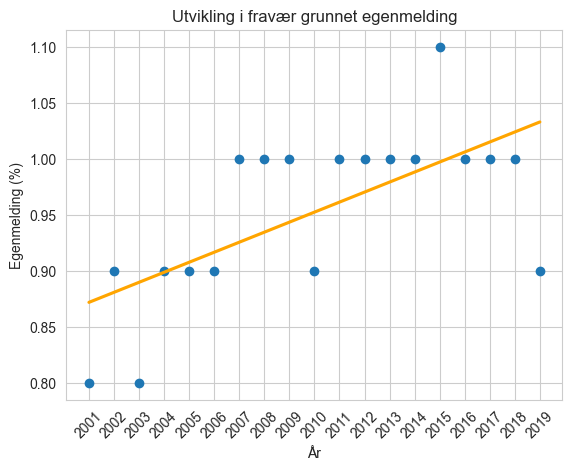

In [8]:
#egenmelding data ssb api url
em_url = "https://data.ssb.no/api/v0/no/table/12441/"

#query - spørring om ønsket data
em_query = {
  "query": [
    {
      "code": "Kjonn",
      "selection": {
        "filter": "item",
        "values": [
          "0"
        ]
      }
    },
    {
      "code": "NACE2007",
      "selection": {
        "filter": "item",
        "values": [
          "10-33"
        ]
      }
    },
    {
      "code": "Sykefraver2",
      "selection": {
        "filter": "item",
        "values": [
          "E"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

#lager df
em, em_id, ds = apiToDataframe(em_url, em_query)

#gjør år variabelen til heltall isteden for tekst(string)
em = em.astype({'år':'int'})

#filtrerer ut koronnaårene
em = em[em["år"] < 2020] #bare data fra før 2020 da vi ikke ønsker koronnaår

#plotstyle
sns.set_style("whitegrid")

#regresjon
sns.regplot(x="år", y="value", data=em, scatter=False, color='orange', label='Regression Line', ci=None)

#scatterplot
plt.scatter(em["år"], em["value"])
#x and y lab
plt.xlabel("År")
plt.xticks(em["år"], em["år"].astype(int), rotation=45) #gør x akse tall til heltall
plt.ylabel("Egenmelding (%)")

#tittel
plt.title("Utvikling i fravær grunnet egenmelding")

#show plot
plt.show()

Generelt sett kan man se en svak økning i egenmeldinger siden sangen ble utgitt. I 2002 økte fraværet med 0.1%, og har holdt seg på det økte nivået alle årene frem til og med 2006, med unntak av 2003. Videre etter 2006 kan man se en økning med 0.1% igjen, som har vært relativt stabilt siden. Om denne endringen skyldes sangens utgivelse er vanskelig å si, grunnet at flere faktorer kan påvirke denne endringen. 

Andre faktorer kan blant annet være klimatiske grunner (blir oftere syk ved kaldere vær og eventuelt ved varm sommer med bruk av aircondition), sykdomsår (år hvor individer blir mere syk enn gjennomsnittlig), andre påvirkninger på holdninger, og mere. Dermed kan man ikke si at sangen er den eneste grunnen til det man observerer.

# Oppgave 3.2.b

Egenmeldinger medfører disinsentiv til arbeid, grunnet at arbeidstakerne kan levere egenmeldinger uten noen dokumentasjon fra lege, uten noen særlig konsekvens. For å kunne se på hvilke effekter egenmelding har på individets tilpassing, må man først se på individets nyttefunksjon.

Individet har følgene nyttefunksjon: 

$$U(c, l, \sigma) = c^{1-\sigma} * l^{\sigma}$$

hvor $U$ er nytte/tilfredshet, $c$ er konsum, $l$ er fritid og $\sigma$ er sykdomsindeksen. $\sigma \in [0, 1]$, som vil si at $\sigma$ er et tall mellom $0$ og $1$. Nærmere null $\sigma$ er $\rightarrow$ jo mindre syk er individet, som igjen gjør at individet verdsetter konsum høyere i forhold til fritid. På andre siden, desto nærmere $1$ $\sigma$ er, desto mer syk er individet. Her vil individet verdsette fritid mer i forhold til konsum, da en gjerne ønsker å bli frisk raskest mulig.

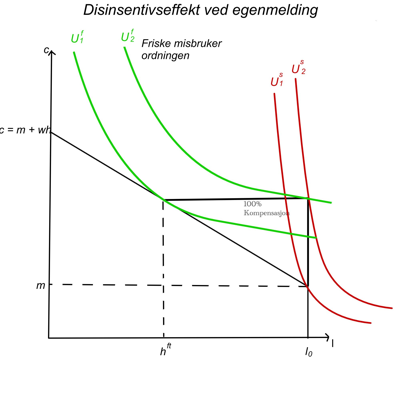

In [9]:
#bilde lokalikasjon
image_path = 'disinsentiv_em.jpg'

#åpne bilde
image = Image.open(image_path)

#size
new_size = (400, 400)

#endre strl
resized_image = image.resize(new_size)

#display
display(resized_image)

Figuren viser individets nytte, både når en er frisk og ved sykdom. $U^s$ representerer individets nytte når en er syk og $\sigma$ er nærmere $1$. Her kan man se at individet får økt nytte som følge av kompensasjonen, som er 100% av lønnen som individet hadde når en var frisk. Nytten når indivdet er syk øker fra $U^s_1$ til $U^s_2$ grunnet kompenasjonen. Dersom individet ikke var syk ville en tilpasset seg der $U^f_1$ tangerer budsjettlinjen, som representerer hvor mye individet kan tjene ved å jobbe fulltid, inkludert arbeidsfri inntekt. Her vil $\sigma$ være nærmere $0$. Dersom ett friskt individ velger å ta "fri" ved bruk av egenmelding, vil en oppnå en økt nytte $U^f_2$, grunnet økt mengde fritid og likt konsum som tidligere. Individet tilpasser seg der $U^f_2$ tangerer med 100% kompensasjonslinjen ved $l_0$ fritid (maks fritid indivdet kan oppnå). Dette forklarer fenomenet vokalisten synger om i sangen "Tredagern". 

# Oppgave 3.2.c

En måte å kunne redusere antall som misbruker egenmeldinger til fri fra arbeid er å redusere kompenasjonsgraden. En redusert kompenasjonsgrad vil alikevell fortsatt gi økt nytte til individet når en er syk (men lavere en tidligere), men vil kunne redusere insentivet til å benytte denne ordningen til "fri". Figuren nedenfor viser hva som skjer.

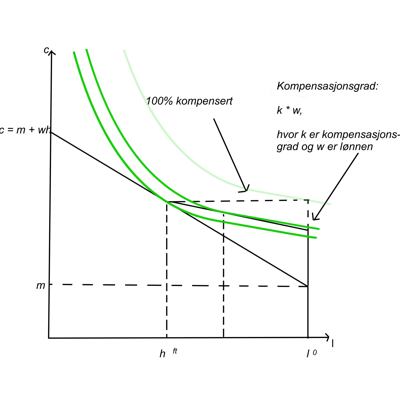

In [10]:
#bilde lokalikasjon
image_path2 = 'kompgrad.jpg'

#åpne bilde
image2 = Image.open(image_path2)

#size
new_size = (400, 400)

#endre strl
resized_image2 = image2.resize(new_size)

#display
display(resized_image2)

Figuren viser hvordan individet ville tilpasset seg om kompensasjonsgraden var blitt redusert. Her ser man at individet vil få mindre nytte enn tidligere ved bruk av egenmelding. Dette kan hjelpe for å motvirke insentivene til å misbruke egenmelding, da en har mindre muligheter å konsumere. Ved en eventuell innføring av en lavere kompensasjonsgrad, må man ta hensyn til at man ikke setter denne for lav grunnet at enkelte individer alikevell kan gå på arbeid når deres helsetilstand sier at de ikke burde.

En annen mulighet til redusert kompensasjonsgrad vil være en gradvis fallende kompensasjonsgrad. Dette vil gå mindre utover individer, hvor deres helsetilstand tilsier de burde holde seg hjemme til de blir friske. Samtidig styrker dette insentivet til å returnere til arbeid, da dette går utover individets konsummuligheter.

# Appendix

ChatGPT (25. september 2023 version): https://chat.openai.com/share/82abebaf-2616-4bcd-a6a6-bfa27fce84b1